### import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
# %matplotlib inline
# %matplotlib ipympl
import random

### get input

First line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
<p>
input.txt contains:</p>


``` pearl
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

In [3]:
# choose filepath here
filepath1 = "input.txt" 
filepath2 = "tsp40.txt"

In [4]:

data=np.loadtxt(filepath2,skiprows=1)
x_cities = data[:,0]
y_cities = data[:,1]

with open(filepath2, "r") as file:
     N = int(file.readline().strip())

#list of tuple of coordinates.
cities = [(x,y) for x,y in zip(x_cities,y_cities)]



### distance_cost
total distance along a closed loop that the salesman takes

In [5]:
def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def tour_distance(tour,cities):
    """tour is a given permutation of the numbers 0 to n-1"""
    total_distance=0
    for i in range(len(tour)-1):
        current_city = tour[i]
        next_city = tour[i+1]
        total_distance += euclidean_distance(cities[current_city][0],cities[current_city][1],
                                            cities[next_city][0],cities[next_city][1])
        
        # now add the distance between the first and the last nodes
        initial_city = tour[0]
        final_city = tour[-1]
        total_distance += euclidean_distance(cities[initial_city][0],cities[initial_city][1],
                                            cities[final_city][0],cities[final_city][1])
        
        return total_distance
    

### Simulated Annealing

- We first choose a random tour. 
- we then make slight nudges from this tour, hoping to get to the optimum.
- The notion of random walk is introduced here- which edge is going to be changed and with what probability is that change going to be adapted.
- the reason this method works is that as the temperature decreases, there is a tendency for the process to shift to the global optimum.
- Slower the rate of cooling, better(more stable) the solution is.
- It is important to note that the initial choice of a random path is also deterministic of how good the final solution will be ie., if I had employed a greedy algorithm to find out a suboptimal solution and then improvised upon it using simulated annealing, the chances of ending up with an optimal solution is high.
- Ideally, to find the most optimal solution, you would have to repeat simulated annealing with several distinct starting random tours and then consider an average of sorts as the result. But this brute-force does not finish in polynomial time(that's why it is NP hard)

In [6]:
def tsp(cities):
    """cities is a list of (float, float) tuples,
    report cityorder, a 1d array with the numbers 0 to n-1,
    representing the optimal solution."""
    
        # Define the number of cities and their coordinates
    num_cities = N
    cities = np.array(cities)

    # Define the initial temperature and cooling rate
    initial_temperature = 1000.0
    cooling_rate = 0.003

    # Helper function to calculate the total distance of a tour
    # def tour_distance(tour, cities):
    #     total_distance = 0
    #     for i in range(len(tour) - 1):
    #         city1 = cities[tour[i]]
    #         city2 = cities[tour[i + 1]]
    #         total_distance += np.linalg.norm(city1 - city2)
    #     return total_distance

    # Initialize a random tour
    current_tour = list(range(num_cities))
    random.shuffle(current_tour)
    current_distance = tour_distance(current_tour, cities)

    # Initialize the best tour and best distance
    best_tour = current_tour
    best_distance = current_distance

    # Simulated annealing algorithm
    current_temperature = initial_temperature

    while current_temperature > 1:
        # Generate a random neighboring tour by swapping two cities
        new_tour = current_tour.copy()
        i, j = random.sample(range(num_cities), 2)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_distance = tour_distance(new_tour, cities)

        # Calculate the change in distance
        delta_distance = new_distance - current_distance

        # If the new tour is better or accepted by a probability, update the current tour
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / current_temperature):
            current_tour = new_tour
            current_distance = new_distance

        # Update the best tour if necessary
        if current_distance < best_distance:
            best_tour = current_tour
            best_distance = current_distance

        # Reduce the temperature
        current_temperature *= 1 - cooling_rate

    cityorder = best_tour
    return cityorder



### plot output
plot coordinates of the cities along with the path taken and also report the total distance along this closed loop


In [7]:
def distance(cities, cityorder):
    """give the total distance the salesman has to travel in the closed loop given by cityorder."""
    return tour_distance(cityorder, cities)

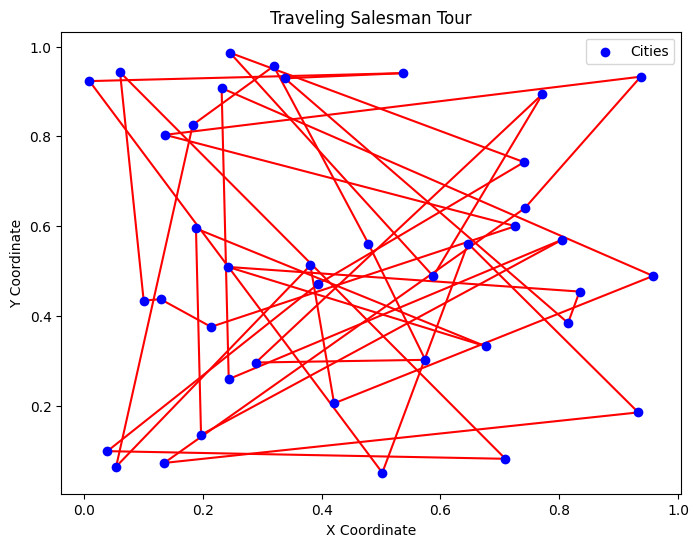

In [8]:
# plot the tour

tour = tsp(cities)


# Extract x and y coordinates from cities
x = [city[0] for city in cities]
y = [city[1] for city in cities]

# Create a plot to display the cities
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', label='Cities', zorder=2)

# Plot lines to represent the tour
for i in range(len(tour) - 1):
    city1 = tour[i]
    city2 = tour[i + 1]
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    plt.plot([x1, x2], [y1, y2], color='r', linestyle='-', zorder=1)

# Connect the last city to the starting city to complete the tour
x1, y1 = cities[tour[-1]]
x2, y2 = cities[tour[0]]
plt.plot([x1, x2], [y1, y2], color='r', linestyle='-', zorder=1)

# Add labels and legends
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Traveling Salesman Tour')
plt.legend()

# Display the plot
plt.show()


In [9]:
print(f"The predicted path length is {distance(cities, tour)}")

#generate a random permutation of 0 to n-1
random_tour = np.arange(N)
np.random.shuffle(random_tour)
print(f"The path length of a random tour is {distance(cities, random_tour)}")
print(f"The predicted path is approximately {int(distance(cities, random_tour)/distance(cities, tour))} times smaller than a random path ")


The predicted path length is 0.13354138182649541
The path length of a random tour is 1.038943979289692
The predicted path is approximately 7 times smaller than a random path 


### the following is the predicted path for the 4-cities example.

![predicted path for input.txt](tsp_image1.png)
